In [1]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv


--2023-12-06 20:42:41--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  --.-KB/s    in 0.08s   

2023-12-06 20:42:42 (41.9 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [34]:
# import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

In [6]:
data = pd.read_csv('AirlineTweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [23]:
df = data[['airline_sentiment', 'text']]

In [24]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

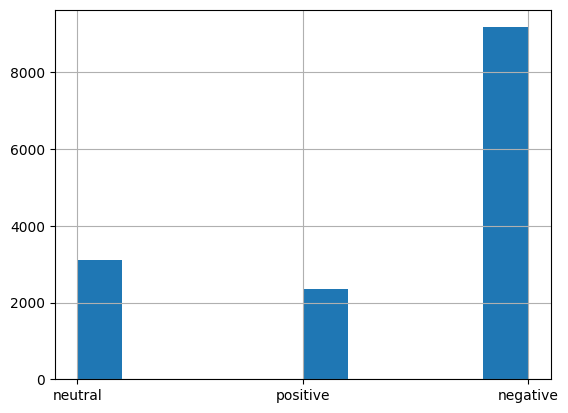

In [25]:
df['airline_sentiment'].hist()

In [26]:
text_conf = data['airline_sentiment_confidence'].to_numpy()

In [27]:
label_mapping = {
    'positive' : 2,
    'neutral' : 1,
    'negative' : 0
}

df['target'] = df['airline_sentiment'].map(label_mapping)
df.head()

<ipython-input-27-d1d43646c969>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['airline_sentiment'].map(label_mapping)


,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,1
1,positive,@VirginAmerica plus you've added commercials t...,2
2,neutral,@VirginAmerica I didn't today... Must mean I n...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [28]:
df_train, df_test = train_test_split(df)

In [29]:
vectorizer = CountVectorizer()

In [30]:
Xtrain = vectorizer.fit_transform(df_train['text'])
Xtest = vectorizer.transform(df_test['text'])
Ytrain = df_train['target']
Ytest = df_test['target']

In [35]:
model = LogisticRegression(max_iter=500)
history = model.fit(Xtrain,Ytrain)

In [36]:
print(f"Train accuracy: {model.score(Xtrain, Ytrain)}")
print(f"Test accuracy: {model.score(Xtest, Ytest)}")

Train accuracy: 0.954735883424408
Test accuracy: 0.8002732240437158


In [56]:
ytrue = Ytest
ypred = model.predict_proba(Xtest)#[:1]

In [57]:
roc_auc_score(ytrue, ypred, multi_class='ovo')

0.8947201030935382

In [52]:
ypred_labels = np.argmax(ypred, axis=1)

cm = confusion_matrix(ytrue, ypred_labels)

Text(0.5, 1.0, 'Confusion Matrix')

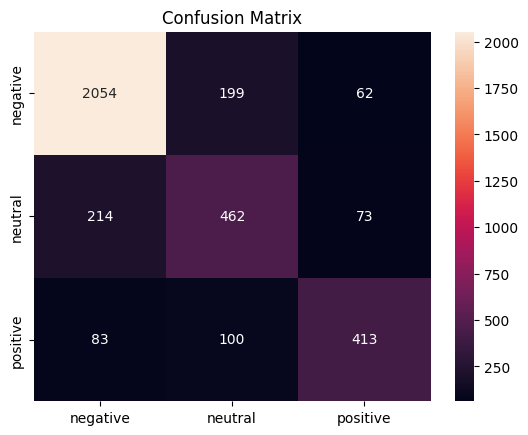

In [59]:
classes = ['negative', 'neutral', 'positive']
sns.heatmap(cm, xticklabels=classes, yticklabels=classes, annot=True, fmt='g')
plt.title('Confusion Matrix')